## **CNN_LSTM Model Training**
---
Following the input and hyperparameter optimizations, we fixed on a model that takes ***four 150 x 150*** images and predicts the 5th image as output. The network consists of ***three Local Feature Learning Blocks (LFLB)***, where each LFLB is made up of Convolution layers, which are followed by ***two LSTM layers.***

---
Network Architecture: 
- LFLB 1
  - Conv2D(filters=32, strides=(3,3))
  - BatchNormalization
  - Conv2D(filters=32, strides=(3,3))
  - BatchNormalization
  - MaxPooling2D(pool_size=(4,4))
  - Dropout(0.4)
- LFLB 2
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - MaxPooling2D(pool_size=(4,4))
  - Dropout(0.4)
- LFLB 3
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - MaxPooling2D(pool_size=(4,4))
  - Dropout(0.4)
- Flatten
- LSTM Layers
  - LSTM_1(num_units=1024, activation='tanh')
  - LSTM_2(num_units=1024, activation='tanh')
- Dense(units=22500, activation='softplus')

---
Organizing the Data: 
- Input images to be present inside the ***INSAT3D_TIR1_PNG*** folder either inside the Drive or on local
- Images to be named as ***0.png*** to ***44.png***

---
Model Outputs:
- ***loss: 55.8962 - val_loss: 339.6556***
- Time taken to train: ***174.56293845176697 seconds***
- Time taken to generate output: ***0.13999462127685547 seconds***

In [4]:
# Run this cell always before generating any model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

In [5]:
# Required imports for building the model
import keras
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Dense, TimeDistributed, BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [7]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


(150, 150)


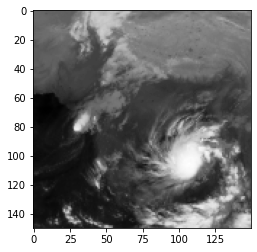

In [8]:
# Read the input images
import os
images = []
# Load in the images
i=0
for filepath in os.listdir('drive/My Drive/INSAT3D_TIR1_PNG'):
    img = cv.imread('drive/My Drive/INSAT3D_TIR1_PNG/{0}'.format(filepath),0)
    images.append(cv.resize(img,(150,150),interpolation=cv.INTER_AREA))
    i+=1
first_frame = images[0]
print(first_frame.shape)
plt.imshow(first_frame, cmap='gray')

In [9]:
i=0
for filepath in os.listdir('drive/My Drive/SEQ1'):
    img = cv.imread('drive/My Drive/SEQ1/{0}'.format(filepath),0)
    images.append(cv.resize(img,(150,150),interpolation=cv.INTER_AREA))
    i+=1
f_frame = images[55]
print(f_frame.shape)


(150, 150)


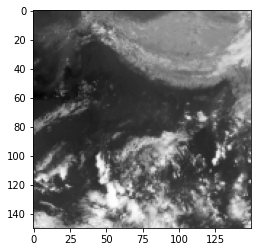

In [10]:
plt.imshow(f_frame, cmap='gray')

In [11]:
images=np.array(images)/255.0

In [ ]:
# Build the Model
model = Sequential()
model.add(BatchNormalization(input_shape=(4,150,150,1)))

model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(units=1024, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(units=1024, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
model.add(Dense(22500, activation='softplus'))

model.compile(loss='mean_squared_error', optimizer='nadam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 4, 150, 150, 1)    4         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 148, 148, 32)   320       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 148, 148, 32)   128       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 4, 146, 146, 32)   9248      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 4, 146, 146, 32)   128       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 4, 36, 36, 32)     0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 4, 36, 36, 32)    

In [22]:
x=[]
y=[]
y1=[]
for i in range(41):
  x.append(np.asarray(images[i:i+4]).reshape(4,150,150,1))
for j in range(41):
  y1.append( np.asarray(images[j+4]).reshape(22500))
  y.append( np.asarray(images[j+4]).reshape(150,150,1))


In [23]:
for i in range(45,71):
  x.append(np.asarray(images[i:i+4]).reshape(4,150,150,1))
for j in range(45,71):
  y1.append( np.asarray(images[j+4]).reshape(22500))
  y.append( np.asarray(images[j+4]).reshape(150,150,1))

x=np.array(x)
y=np.array(y)

In [24]:
#x1=np.array(x1)
y.shape

(67, 150, 150, 1)

In [44]:
import time
start_time = time.time()
model.fit(x, y,batch_size=16, epochs=30)
print("Time taken to train: " + str(time.time() - start_time))

Epoch 1/30
67/67 [==============================] - 25s 371ms/step - loss: 8411.3044
Epoch 2/30
67/67 [==============================] - 25s 372ms/step - loss: 7255.2661
Epoch 3/30
67/67 [==============================] - 25s 370ms/step - loss: 6094.9768
Epoch 4/30
67/67 [==============================] - 25s 370ms/step - loss: 5039.8161
Epoch 5/30
67/67 [==============================] - 25s 372ms/step - loss: 4130.9443
Epoch 6/30
67/67 [==============================] - 25s 369ms/step - loss: 3367.2828
Epoch 7/30
67/67 [==============================] - 25s 370ms/step - loss: 2736.0551
Epoch 8/30
67/67 [==============================] - 25s 369ms/step - loss: 2219.6317
Epoch 9/30
67/67 [==============================] - 25s 369ms/step - loss: 1697.3580
Epoch 10/30
67/67 [==============================] - 25s 366ms/step - loss: 723.4423
Epoch 11/30
67/67 [==============================] - 25s 369ms/step - loss: 1.5039
Epoch 12/30
67/67 [==============================] - 25s 368ms/step

In [74]:
p=model.predict(x[42:43])


In [75]:
op=p[0].reshape(150,150)
op*=255
print(op)

[[ 94.22923   92.70391  103.16247  ... 126.645454 115.61859  113.01204 ]
 [ 97.178696 107.25     103.32643  ... 114.28984  109.90512  119.93262 ]
 [ 96.9742    99.131714 101.10423  ... 108.96092  114.33271  103.99775 ]
 ...
 [ 60.021255  61.023876  62.34543  ... 113.227585 118.55054  120.6187  ]
 [ 62.730305  63.792095  61.541935 ... 116.71631  127.22856  123.45435 ]
 [ 62.1785    62.46012   60.120213 ... 128.15167  134.45242  129.13351 ]]


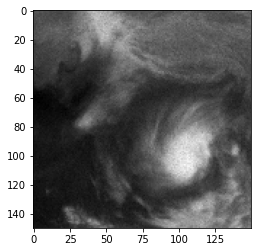

In [63]:
outp=model.predict(x)*255
for i in range(len(outp)):
    z=outp[i].reshape(150,150)
    plt.imshow(np.asarray(z, 'int'), cmap='gray')

In [ ]:
import time
start_time = time.time()
model.fit(np.asarray(images[0:4]).reshape(1,4,150,150,1), np.asarray(images[4]).reshape(1,22500),
          validation_data = (np.asarray(images[4:8]).reshape(1,4,150,150,1), np.asarray(images[8]).reshape(1,22500)),
          batch_size=4, epochs=150)
print("Time taken to train: " + str(time.time() - start_time))

Train on 1 samples, validate on 1 samples
Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 9781.6924 - val_loss: 9027.1035
Epoch 2/150
1/1 [==============================] - 1s 1s/step - loss: 9746.7842 - val_loss: 8826.6582
Epoch 3/150
1/1 [==============================] - 1s 1s/step - loss: 9413.2363 - val_loss: 8477.8271
Epoch 4/150
1/1 [==============================] - 1s 1s/step - loss: 9153.8623 - val_loss: 8255.4199
Epoch 5/150
1/1 [==============================] - 1s 1s/step - loss: 8937.0537 - val_loss: 8067.4185
Epoch 6/150
1/1 [==============================] - 1s 1s/step - loss: 8739.3604 - val_loss: 7884.9165
Epoch 7/150
1/1 [==============================] - 1s 1s/step - loss: 8546.3311 - val_loss: 7704.2559
Epoch 8/150
1/1 [==============================] - 1s 1s/step - loss: 8357.1211 - val_loss: 7524.1450
Epoch 9/150
1/1 [==============================] - 1s 1s/step - loss: 8170.5601 - val_loss: 7347.2192
Epoch 10/150
1/1 [======================

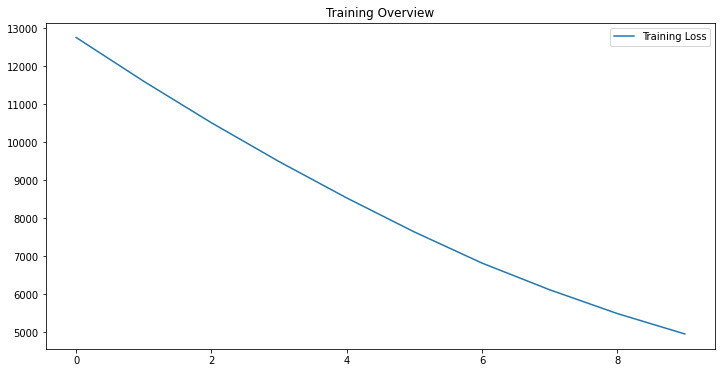

In [149]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(12,6))
plt.title("Training Overview")
plt.plot(loss['loss'], label="Training Loss")
#plt.plot(loss['val_loss'], label="Validation Loss")
plt.legend()

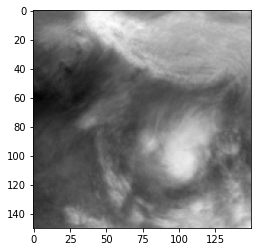

In [169]:
  i=58
  op = model.predict(np.array(images[i:i+4]).reshape(1,4,150,150,1))
  op = op.reshape(1,150,150)
  op.shape
  plt.imshow(np.asarray(op[0], 'int'), cmap='gray')

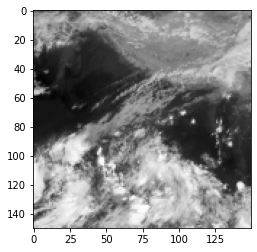

In [167]:
  plt.imshow(np.asarray(images[62], 'int'), cmap='gray')

In [64]:
output = model.predict(x)

In [67]:
output[0]

array([0.36973482, 0.36373493, 0.40501496, ..., 0.5025778 , 0.52740026,
       0.5064015 ], dtype=float32)

In [11]:
for i in range(0,20):
 # plt.figure(figsize=(12,9))

 

  #plt.subplot(224)
 # plt.imshow(np.asarray(output[i].reshape(150,150)*255, 'int'), cmap='gray')
#plt.imshow(np.asarray(y[i].reshape(150,150)*255, 'int'), cmap='gray')
 # cv.imwrite('drive/My Drive/MeghNA_Models/OP/pred '+str(i+4)+ ".png", np.asarray(output[i].reshape(150,150)))
  #plt.title("Predicted0 Image" + str(i))
  j=0
 # plt.savefig('drive/My Drive/MeghNA_Models/Predicted 12th.png')

In [120]:
model.save('drive/My Drive/MeghNA_Models/[3CNN_2LSTM_Sequence_4_Size_150_TIR].h5')

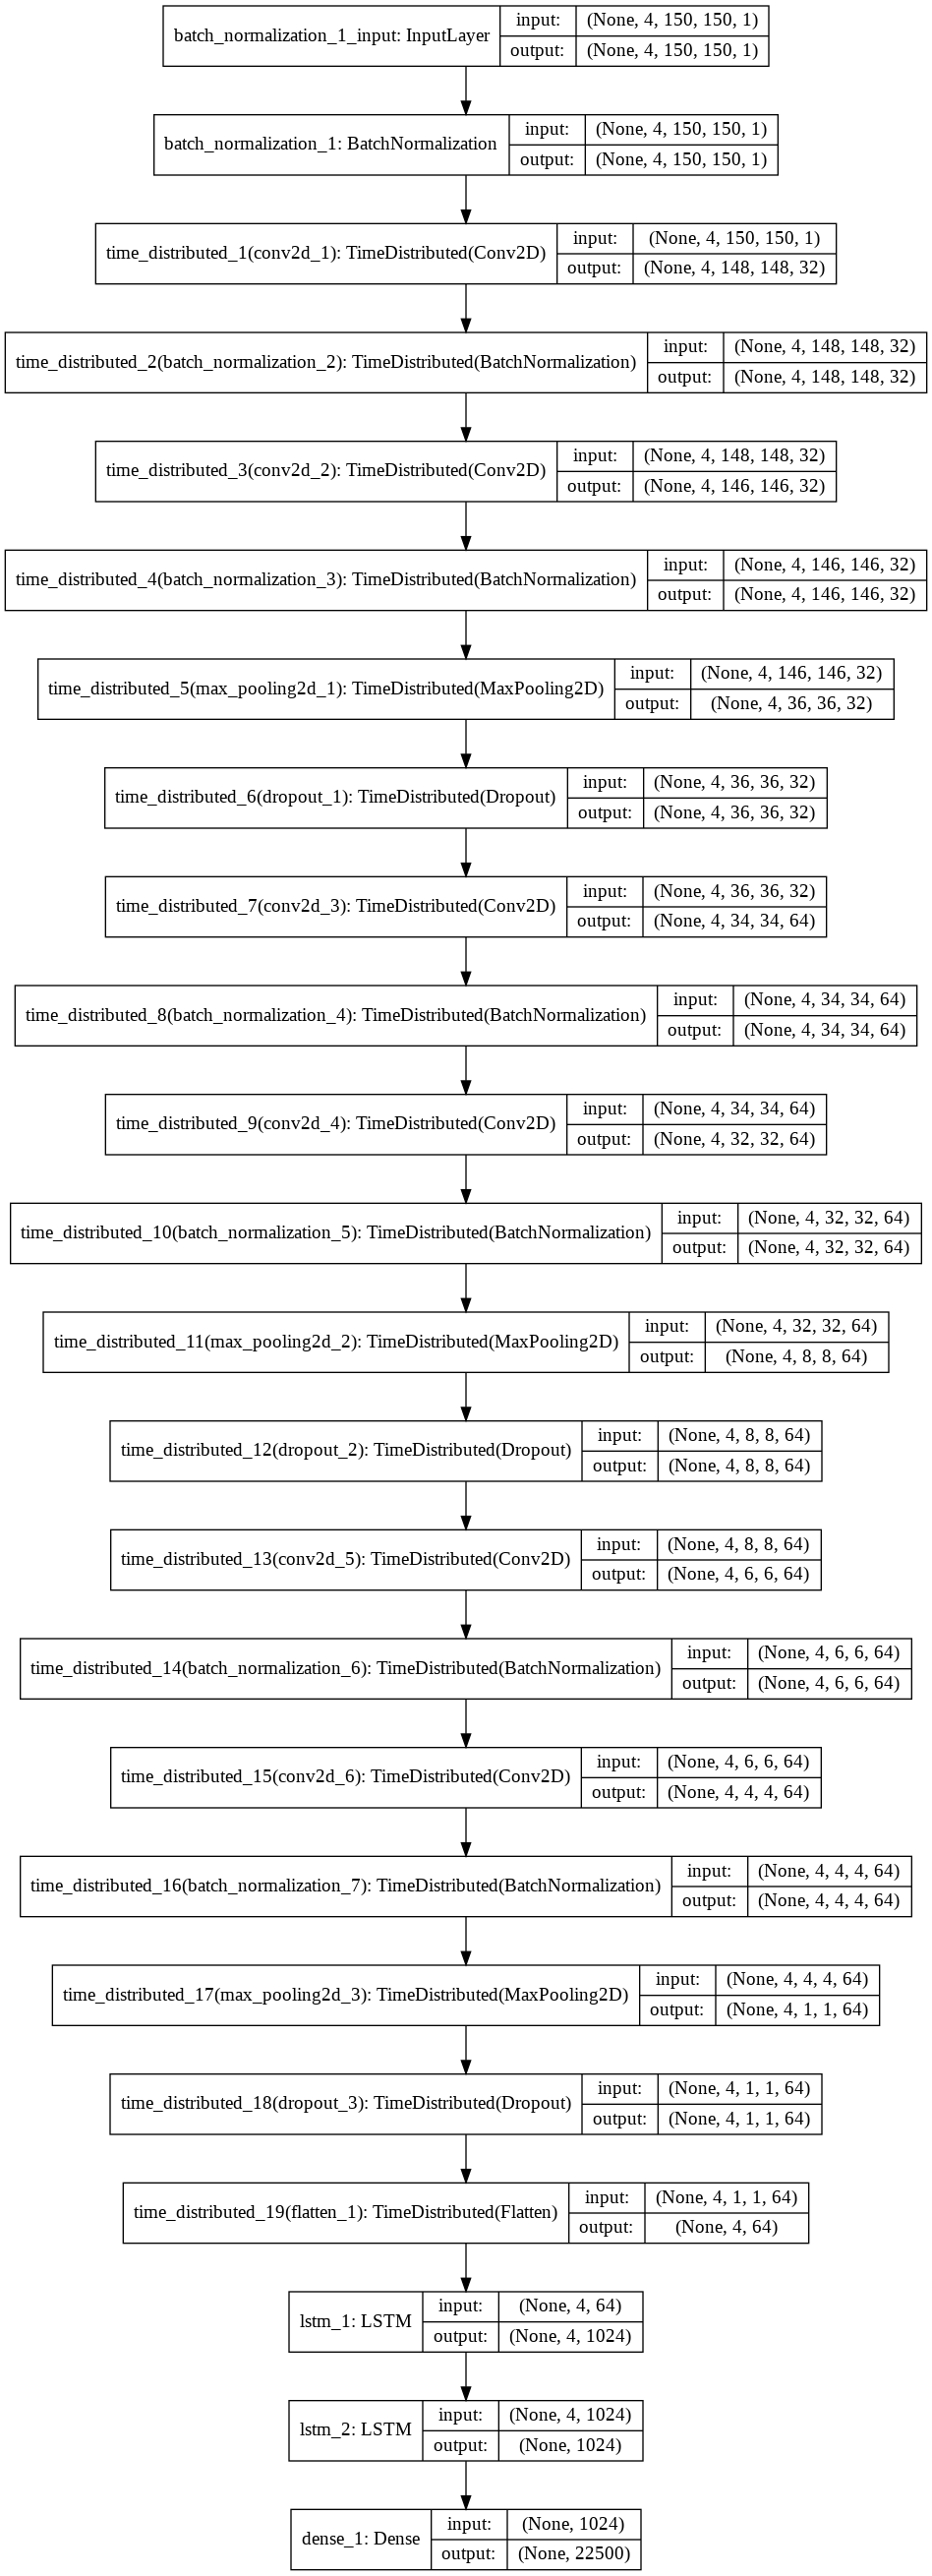

In [ ]:
# Visualize the Model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='drive/My Drive/MeghNA_Models/CNN_LSTM_model_plot.png', show_shapes=True, show_layer_names=True)

Time taken to regenerate image: 0.1302964687347412
(1, 150, 150)


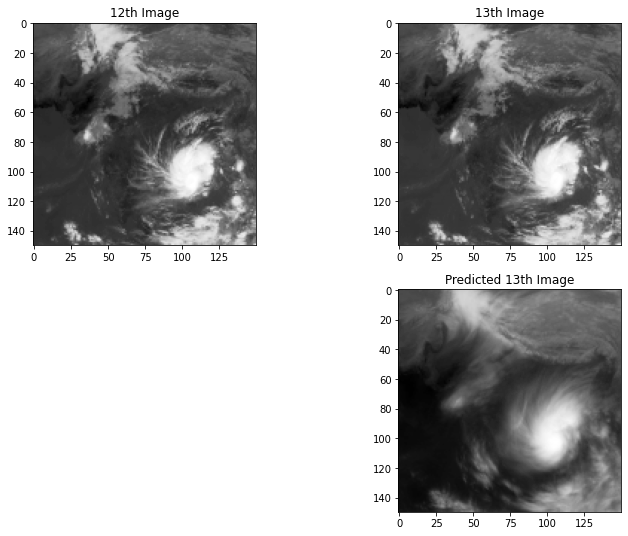

In [121]:
start_time = time.time()
output = model.predict(np.array(images[9:13]).reshape(1,4,150,150,1))
output = output.reshape(1,150,150)
print("Time taken to regenerate image: " + str(time.time() - start_time))
print(output.shape)

plt.figure(figsize=(12,9))

plt.subplot(221)
plt.imshow(images[11], cmap='gray')
plt.title("12th Image")

plt.subplot(222)
plt.imshow(images[12], cmap='gray')
plt.title("13th Image")

plt.subplot(224)
plt.imshow(np.asarray(output[0,:,:].reshape(150,150), 'int'), cmap='gray')
plt.title("Predicted 13th Image")
plt.savefig('drive/My Drive/MeghNA_Models/Predicted_13th.png')

In [ ]:
output = output.reshape(150,150)
output.shape

(150, 150)

In [ ]:
image_resized = cv.resize(output, dsize=(984,1074),interpolation=cv.INTER_AREA)
# cv.imshow(image_resized)
cv.imwrite('drive/My Drive/MeghNA_Models/Rescaled 13th INTER_AREA.png', image_resized)
# plt.axis('off')
# plt.imshow(image_resized)
# plt.savefig('drive/My Drive/MeghNA_Models/Rescaled 13th.png')
print(image_resized.shape)

(1074, 984)


In [ ]:
from skimage import measure
def get_error(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	s = measure.compare_ssim(imageA, imageB)
	return {"mse": err, "ssim": s}

In [ ]:
def predict_motion(t, model):
  """
  This function returns the path where the GIF for current motion
  is saved by the ConvLSTM model.
  :param t: number representing the latest image
  """
  images = []
  for i in range(t-3,t+2):
    img = cv.imread('drive/My Drive/INSAT3D_TIR1_PNG/' + str(i) + '.png',0)
    img = cv.resize(img,(150,150),interpolation=cv.INTER_AREA)
    images.append(img)
    if i != t+1:
      path = 'drive/My Drive/MeghNA_Models/outputs/'+str(i)+'.png'
      plt.imshow(img, cmap='gray')
      plt.axis('off')
      plt.savefig(path)

  output = model.predict(np.array(images[:-1]).reshape(1,4,150,150,1))
  output = output.reshape(150,150)
  print(get_error(np.asarray(images[-1]), output))

  path = 'drive/My Drive/MeghNA_Models/outputs/' + str(t+1) + '.png'
  plt.imshow(output, cmap='gray')
  plt.axis('off')
  plt.savefig(path)
  return path

{'mse': 754.6567983076675, 'ssim': 0.5035715899689427}
drive/My Drive/MeghNA_Models/outputs/13.png


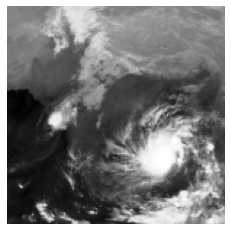

In [ ]:
from keras.models import load_model
model = load_model('drive/My Drive/MeghNA_Models/[3CNN_2LSTM_Sequence_4_Size_150_TIR].h5')
path = predict_motion(12, model)
print(path)

In [ ]:
import keras as K
print(K.__version__)

2.3.1


In [20]:
import os
from os import listdir
from PIL import Image as PImage
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.image as img
import PIL as Image
from keras.preprocessing.image import ImageDataGenerator
import sys
from keras.callbacks import TensorBoard
print(sys.version)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [25]:
c_model = Sequential()
c_model.add(ConvLSTM2D(3,kernel_size=(3,3),input_shape=(4,150,150, 1),padding='same', return_sequences=True,go_backwards=True))
c_model.add(ConvLSTM2D(1,kernel_size=(3,3),padding='same', return_sequences=True,go_backwards=True))
c_model.add(ConvLSTM2D(1,kernel_size=(3,3),padding='same', return_sequences=False,go_backwards=True))
c_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 4, 150, 150, 3)    444       
_________________________________________________________________
conv_lst_m2d_5 (ConvLSTM2D)  (None, 4, 150, 150, 1)    148       
_________________________________________________________________
conv_lst_m2d_6 (ConvLSTM2D)  (None, 150, 150, 1)       76        
Total params: 668
Trainable params: 668
Non-trainable params: 0
_________________________________________________________________


In [26]:
c_model.compile(loss='mean_squared_error',
              optimizer='adam',
               metrics=['accuracy']
                  )


In [44]:

history = c_model.fit(x, y,
                epochs=30,
                batch_size = 8,
                shuffle = False,
               )

Epoch 1/30
67/67 [==============================] - 2s 25ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 2/30
67/67 [==============================] - 2s 24ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 3/30
67/67 [==============================] - 2s 24ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 4/30
67/67 [==============================] - 2s 24ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 5/30
67/67 [==============================] - 2s 24ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 6/30
67/67 [==============================] - 2s 24ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 7/30
67/67 [==============================] - 2s 24ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 8/30
67/67 [==============================] - 2s 23ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 9/30
67/67 [==============================] - 2s 23ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 10/30
67/67 [==============================] - 2s 24ms/step - loss:

In [49]:
t=c_model.predict(x)

In [50]:
t.shape

(67, 150, 150, 1)

In [53]:
count=4
for i in t:
  cv.imwrite('drive/My Drive/MeghNA_Models/outputs_new/img '+str(count)+".png",np.asarray(i.reshape(150,150))*255)
  count+=1
                                                                                                                                   

In [52]:
len(t)

67

In [41]:
conv_model = Sequential()
conv_model.add(ConvLSTM2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(4, 150, 150, 1), return_sequences=True, stateful=False))
conv_model.add(BatchNormalization())
conv_model.add(ConvLSTM2D(filters=16, kernel_size=(3,3), padding='same', return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(ConvLSTM2D(filters=32, kernel_size=(3,3), padding='same', return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(Dropout(0.3))
conv_model.add(ConvLSTM2D(filters=16, kernel_size=(3,3), padding='same', return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(Dropout(0.3))
conv_model.add(ConvLSTM2D(filters=1, kernel_size=(3,3), padding='same', return_sequences=False))
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_7 (ConvLSTM2D)  (None, 4, 150, 150, 16)   9856      
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 150, 150, 16)   64        
_________________________________________________________________
conv_lst_m2d_8 (ConvLSTM2D)  (None, 4, 150, 150, 16)   18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 150, 150, 16)   64        
_________________________________________________________________
conv_lst_m2d_9 (ConvLSTM2D)  (None, 4, 150, 150, 32)   55424     
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 150, 150, 32)   128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 150, 150, 32)  

In [13]:
x=np.array(x)
y=np.array([i.reshape(150,150,1) for i in y])
print(x.shape)
print(y.shape)

(67, 4, 150, 150, 1)
(67, 150, 150, 1)


In [42]:
conv_model.compile(loss='mean_squared_error',
              optimizer='adam',
               metrics=['accuracy']
                  )


In [57]:

history = conv_model.fit(x, y,
                epochs=10,
                batch_size = 8,
                shuffle = False,
               )

Epoch 1/10
67/67 [==============================] - 10s 154ms/step - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 2/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 3/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 4/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 5/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0146 - accuracy: 0.0000e+00
Epoch 6/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0146 - accuracy: 0.0000e+00
Epoch 7/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 8/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 9/10
67/67 [==============================] - 10s 152ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 10/10
67/67 [==============================] - 10

In [67]:
c_model.save('drive/My Drive/MeghNA_Models/CNN_small.h5')

In [58]:
t=conv_model.predict(x)

In [59]:
t*=255
y.shape

(67, 150, 150, 1)

In [33]:
y*=255

Text(0.5, 1.0, 'Predicted0 Image1')

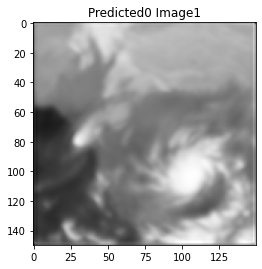

In [62]:
plt.figure(figsize=(12,9))

 
plt.subplot(224)
plt.imshow(np.asarray(t[0].reshape(150,150)*255, 'int'), cmap='gray')
#  plt.imshow(np.asarray(y[i].reshape(150,150)*255, 'int'), cmap='gray')
 # cv.imwrite('drive/My Drive/MeghNA_Models/OP/pred '+str(i+4)+ ".png", np.asarray(output[i].reshape(150,150)))
plt.title("Predicted0 Image" + str(1))


In [126]:
t*=255

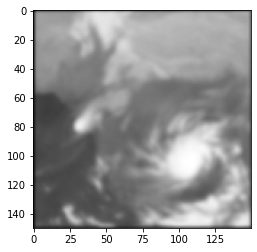

In [127]:
plt.imshow(np.asarray(t[0][0].reshape(150,150), 'int'), cmap='gray')


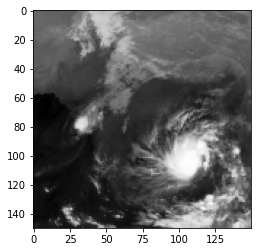

In [66]:
plt.imshow(np.asarray(y[0].reshape(150,150)*255, 'int'), cmap='gray')
